In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
train = train.drop(['PassengerId'],axis=1)

test = pd.read_csv('test.csv')
test = test.drop(['PassengerId'],axis=1)

In [3]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-nu

In [5]:
# total not null and null values
train.Age.notnull().value_counts()

True     714
False    177
Name: Age, dtype: int64

In [6]:
# total null values
print(f'total null values: {train.Age.isnull().sum()}')
# total not null values
print(f'total not null values: {train.Age.notnull().sum()}')
# total values
print(f'total values: {len(train.Age)}')

total null values: 177
total not null values: 714
total values: 891


In [7]:
## null value percentage
print(f'Null Value % : {(train.Age.isnull().sum() / len(train.Age) ) *100}')
## not null value percentage
print(f'Not null Value % : {(train.Age.notnull().sum() / len(train.Age))*100}')

Null Value % : 19.865319865319865
Not null Value % : 80.13468013468014


In [8]:
# total null values
print(f'total null values: {train.Cabin.isnull().sum()}')
# total not null values
print(f'total not null values: {train.Cabin.notnull().sum()}')
# total values
print(f'total values: {len(train.Cabin)}')

total null values: 687
total not null values: 204
total values: 891


In [9]:
## null value percentage
print(f'Null Value % : {(train.Cabin.isnull().sum() / len(train.Cabin) ) *100}')
## not null value percentage
print(f'Not null Value % : {(train.Cabin.notnull().sum() / len(train.Cabin))*100}')

Null Value % : 77.10437710437711
Not null Value % : 22.895622895622896


### Observations -->
1. there are 19.86 % null values and 80.13% of not null values present in Age features
2. Cabin has null values
3. Cabin has 70% null and  22 % not null values
### Conclusion -->
1. we have hight number of null values in Cabin column so we can drop it.
2. we convert Age into int and fill the Nan values

In [10]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [12]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 32.8+ KB


## Feature engineering

In [14]:
train.Cabin = train.Cabin.astype(str).str[0]

test.Cabin = test.Cabin.astype(str).str[0]

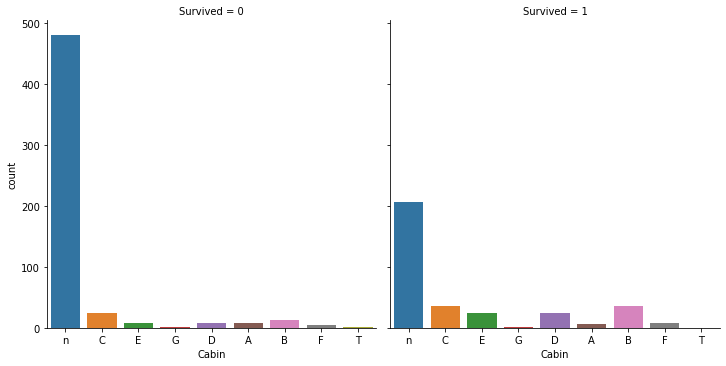

In [15]:
sns.catplot(x='Cabin',col='Survived',data=train,kind='count')

In [16]:
train.groupby(['Cabin','Sex'])['Survived'].sum()

Cabin  Sex   
A      female      1
       male        6
B      female     27
       male        8
C      female     24
       male       11
D      female     18
       male        7
E      female     14
       male       10
F      female      5
       male        3
G      female      2
T      male        0
n      female    142
       male       64
Name: Survived, dtype: int64

In [17]:
train.Cabin.value_counts()

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [18]:
cabin_map = {"n":0,'C':1,"B":2,"D":3,"E":4,'A':5,'F':6,"G":7,"T":8}

In [19]:
train.Cabin = train.Cabin.map(cabin_map)

test.Cabin = test.Cabin.map(cabin_map)

In [20]:
train.Embarked = train.Embarked.fillna(train.Embarked.mode()[0])

test.Fare = train.Fare.fillna(train.Fare.mode()[0])

In [21]:
train.Embarked.isnull().sum()

0

In [22]:
train.Sex = train.Sex.map({'male':0,'female':1})

test.Sex = test.Sex.map({'male':0,'female':1})

In [23]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,C
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,1,S
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,S


In [24]:
train.Age = train.Age.fillna(train.Age.median())

test.Age = test.Age.fillna(test.Age.median())

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    int64  
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    int64  
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(6), object(3)
memory usage: 76.7+ KB


In [26]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    int64  
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     418 non-null    int64  
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 32.8+ KB


In [27]:
train['Title'] = train.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

test['Title'] = test.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [28]:
train['Title'] = train['Title'].replace(['Lady', 'Countess','Capt', 'Col',
                                             'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

train['Title'] = train['Title'].replace('Mlle', 'Miss')
train['Title'] = train['Title'].replace('Ms', 'Miss')
train['Title'] = train['Title'].replace('Mme', 'Mrs')

In [29]:
test['Title'] = test['Title'].replace(['Lady', 'Countess','Capt', 'Col',
                                             'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

test['Title'] = test['Title'].replace('Mlle', 'Miss')
test['Title'] = test['Title'].replace('Ms', 'Miss')
test['Title'] = test['Title'].replace('Mme', 'Mrs')

In [30]:
train.Title.value_counts()

Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: Title, dtype: int64

In [31]:
test.Title.value_counts()

Mr        240
Miss       79
Mrs        72
Master     21
Rare        6
Name: Title, dtype: int64

In [32]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
train.Title = train.Title.map(title_mapping)

test.Title = test.Title.map(title_mapping)

In [33]:
train = train.drop('Name',axis=1)

test = test.drop('Name',axis=1)

In [34]:
train.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [35]:
test.Embarked.value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [36]:
Embarked_map = {"S":0,'C':1,"Q":2}

In [37]:
train.Embarked = train.Embarked.map(Embarked_map)

test.Embarked = test.Embarked.map(Embarked_map)

In [38]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,0,22.0,1,0,A/5 21171,7.2500,0,0,1
1,1,1,1,38.0,1,0,PC 17599,71.2833,1,1,3
2,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,0,0,2
3,1,1,1,35.0,1,0,113803,53.1000,1,0,3
4,0,3,0,35.0,0,0,373450,8.0500,0,0,1


In [39]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,3,0,34.5,0,0,330911,7.2500,0,2,1
1,3,1,47.0,1,0,363272,71.2833,0,0,3
2,2,0,62.0,0,0,240276,7.9250,0,2,1
3,3,0,27.0,0,0,315154,53.1000,0,0,1
4,3,1,22.0,1,1,3101298,8.0500,0,0,3


In [40]:
train.loc[ train['Age'] <= 16, 'Age'] = 0
train.loc[(train['Age'] > 16) & (train['Age'] <= 32), 'Age'] = 1
train.loc[(train['Age'] > 32) & (train['Age'] <= 48), 'Age'] = 2
train.loc[(train['Age'] > 48) & (train['Age'] <= 64), 'Age'] = 3
train.loc[(train['Age'] > 64) & (train['Age'] <= train.Age.max()), 'Age'] = 4

In [41]:
test.loc[ test['Age'] <= 16, 'Age'] = 0
test.loc[(test['Age'] > 16) & (test['Age'] <= 32), 'Age'] = 1
test.loc[(test['Age'] > 32) & (test['Age'] <= 48), 'Age'] = 2
test.loc[(test['Age'] > 48) & (test['Age'] <= 64), 'Age'] = 3
test.loc[(test['Age'] > 64) & (test['Age'] <= test.Age.max()), 'Age'] = 4

In [42]:
train.Age.value_counts()

1.0    523
2.0    188
0.0    100
3.0     69
4.0     11
Name: Age, dtype: int64

In [43]:
test.Age.value_counts()

1.0    264
2.0     81
3.0     37
0.0     34
4.0      2
Name: Age, dtype: int64

In [44]:
train = train.drop('Ticket',axis=1)

test = test.drop('Ticket',axis=1)

In [45]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,0,1.0,1,0,7.2500,0,0,1
1,1,1,1,2.0,1,0,71.2833,1,1,3
2,1,3,1,1.0,0,0,7.9250,0,0,2
3,1,1,1,2.0,1,0,53.1000,1,0,3
4,0,3,0,2.0,0,0,8.0500,0,0,1


In [46]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,3,0,2.0,0,0,7.2500,0,2,1
1,3,1,2.0,1,0,71.2833,0,0,3
2,2,0,3.0,0,0,7.9250,0,2,1
3,3,0,1.0,0,0,53.1000,0,0,1
4,3,1,1.0,1,1,8.0500,0,0,3


In [47]:
train['Family_member'] = train.Parch + train.SibSp +1

test['Family_member'] = test.Parch + test.SibSp +1

In [48]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Family_member
0,0,3,0,1.0,1,0,7.2500,0,0,1,2
1,1,1,1,2.0,1,0,71.2833,1,1,3,2
2,1,3,1,1.0,0,0,7.9250,0,0,2,1
3,1,1,1,2.0,1,0,53.1000,1,0,3,2
4,0,3,0,2.0,0,0,8.0500,0,0,1,1


In [49]:
train.Family_member.value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: Family_member, dtype: int64

In [50]:
test.Family_member.value_counts()

1     253
2      74
3      57
4      14
5       7
7       4
11      4
6       3
8       2
Name: Family_member, dtype: int64

In [51]:
train.Family_member.astype(int)

test.Family_member.astype(int)

0      1
1      2
2      1
3      1
4      3
      ..
413    1
414    1
415    1
416    1
417    3
Name: Family_member, Length: 418, dtype: int32

In [52]:
train.loc[ train['Family_member'] == 1, 'Family_member'] = 0
train.loc[(train['Family_member'] > 1) & (train['Family_member'] <= 4), 'Family_member'] = 1
train.loc[(train['Family_member'] > 4) & (train['Family_member'] <= train.Family_member.max()), 'Family_member'] = 2

In [53]:
test.loc[ test['Family_member'] == 1, 'Family_member'] = 0
test.loc[(test['Family_member'] > 1) & (test['Family_member'] <= 4), 'Family_member'] = 1
test.loc[(test['Family_member'] > 4) & (test['Family_member'] <= test.Family_member.max()), 'Family_member'] = 2

In [54]:
train.Family_member.value_counts()

0    537
1    292
2     62
Name: Family_member, dtype: int64

In [55]:
test.Family_member.value_counts()

0    253
1    145
2     20
Name: Family_member, dtype: int64

In [56]:
train = train.drop(['SibSp','Parch'],axis=1)

test = test.drop(['SibSp','Parch'],axis=1)

In [57]:
train['FareBand'] = pd.qcut(train['Fare'], 4)
train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [58]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Family_member,FareBand
0,0,3,0,1.0,7.2500,0,0,1,1,"(-0.001, 7.91]"
1,1,1,1,2.0,71.2833,1,1,3,1,"(31.0, 512.329]"
2,1,3,1,1.0,7.9250,0,0,2,0,"(7.91, 14.454]"
3,1,1,1,2.0,53.1000,1,0,3,1,"(31.0, 512.329]"
4,0,3,0,2.0,8.0500,0,0,1,0,"(7.91, 14.454]"


In [59]:
test.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Family_member
0,3,0,2.0,7.2500,0,2,1,0
1,3,1,2.0,71.2833,0,0,3,1
2,2,0,3.0,7.9250,0,2,1,0
3,3,0,1.0,53.1000,0,0,1,0
4,3,1,1.0,8.0500,0,0,3,1


In [60]:
train.loc[ train['Fare'] <= 7.91, 'Fare'] = 0
train.loc[(train['Fare'] > 7.91) & (train['Fare'] <= 14.454), 'Fare'] = 1
train.loc[(train['Fare'] > 14.454) & (train['Fare'] <= 31), 'Fare']   = 2
train.loc[ train['Fare'] > 31, 'Fare'] = 3

train['Fare'] = train['Fare'].astype(int)

In [61]:
test.loc[ test['Fare'] <= 7.91, 'Fare'] = 0
test.loc[(test['Fare'] > 7.91) & (test['Fare'] <= 14.454), 'Fare'] = 1
test.loc[(test['Fare'] > 14.454) & (test['Fare'] <= 31), 'Fare']   = 2
test.loc[ test['Fare'] > 31, 'Fare'] = 3

test['Fare'] = test['Fare'].astype(int)

In [62]:
train = train.drop('FareBand',axis=1)


In [63]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Family_member
0,0,3,0,1.0,0,0,0,1,1
1,1,1,1,2.0,3,1,1,3,1
2,1,3,1,1.0,1,0,0,2,0
3,1,1,1,2.0,3,1,0,3,1
4,0,3,0,2.0,1,0,0,1,0


In [64]:
test.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Family_member
0,3,0,2.0,0,0,2,1,0
1,3,1,2.0,3,0,0,3,1
2,2,0,3.0,1,0,2,1,0
3,3,0,1.0,3,0,0,1,0
4,3,1,1.0,1,0,0,3,1


In [65]:
train.to_csv('Processed_train.csv')

test.to_csv('Processed_test.csv')

In [66]:
#y_train = train['S']
#main_df = pd.concat([train,test])
#main_df

In [67]:
X_train = train.iloc[:,1:]
y_train = train['Survived']
X_test = test

In [68]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(891, 8)
(891,)
(418, 8)


# Model Training

## Hpyerparameter tunning for model

In [69]:
from sklearn.model_selection import RandomizedSearchCV

def RandomSerchCvFunction(estimator ,param,X_train,y_train,X_test):
    rsc = RandomizedSearchCV(estimator=estimator,param_distributions=param,n_iter=10,n_jobs=-1
                            ,cv=10,verbose=3,scoring='roc_auc')
    rsc.fit(X_train,y_train)
    print("\nBest Estimators...........................")
    print(rsc.best_estimator_)
    print("\nBest Parameters...........................")
    print(rsc.best_params_)
    print("\nAccuracy...........................")
    print(rsc.score(X_train,y_train))

### XGBoost

In [70]:
from xgboost import XGBClassifier

param={'max_depth':[ 3, 18, 1],
        'gamma': [1,9],
        'reg_alpha' : [40,180,1],
        'reg_lambda' : [0,1],
        'colsample_bytree' : [0.5,1],
        'min_child_weight' : [0, 10, 1],
        'n_estimators': [100,120,150,180],
        'seed': [0]
    }

xgb_tunning = XGBClassifier()
RandomSerchCvFunction(xgb_tunning,param,X_train,y_train,X_test)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[12:28:14] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Best Estimators...........................
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=9, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=180, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=1, reg_lambda=0, scale_pos_weight=1, seed=0,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

Best Parameters...................

G:\Program_Files\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


### Xgboost  : 87

### RandomForest

In [71]:
from sklearn.ensemble import RandomForestClassifier
rf_tunning = RandomForestClassifier()
param = {'n_estimators': [10, 25],
              'max_features': [5, 10],
              'max_depth': [10, 50, None],
              'bootstrap': [True, False]
             }
RandomSerchCvFunction(rf_tunning,param,X_train,y_train,X_test)

Fitting 10 folds for each of 10 candidates, totalling 100 fits

Best Estimators...........................
RandomForestClassifier(max_depth=10, max_features=5, n_estimators=10)

Best Parameters...........................
{'n_estimators': 10, 'max_features': 5, 'max_depth': 10, 'bootstrap': True}

Accuracy...........................
0.9443698803779332


G:\Program_Files\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.85618985        nan        nan 0.83827714
        nan 0.85427706        nan 0.83935076]
  warnings.warn(


### RandomForest : 94.97

### Decison Tree

In [72]:
from sklearn.tree import DecisionTreeClassifier
dt_tunning = DecisionTreeClassifier()
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}
RandomSerchCvFunction(dt_tunning,params,X_train,y_train,X_test)

Fitting 10 folds for each of 10 candidates, totalling 100 fits

Best Estimators...........................
DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=20)

Best Parameters...........................
{'min_samples_leaf': 20, 'max_depth': 20, 'criterion': 'entropy'}

Accuracy...........................
0.896909852043588


### Decison Tree : 89.79

### Knn

In [73]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
RandomSerchCvFunction(knn_clf,params,X_train,y_train,X_test)

Fitting 10 folds for each of 10 candidates, totalling 100 fits

Best Estimators...........................
KNeighborsClassifier(metric='manhattan', n_neighbors=13)

Best Parameters...........................
{'weights': 'uniform', 'n_neighbors': 13, 'metric': 'manhattan'}

Accuracy...........................
0.8969657750934714


### Knn : 89.69

## Naive Bayes

In [74]:
from sklearn.naive_bayes import GaussianNB
naive_clf = GaussianNB()
params = {'var_smoothing': np.logspace(0,-9, num=100)}
RandomSerchCvFunction(naive_clf,params,X_train,y_train,X_test)

Fitting 10 folds for each of 10 candidates, totalling 100 fits

Best Estimators...........................
GaussianNB(var_smoothing=0.0001)

Best Parameters...........................
{'var_smoothing': 0.0001}

Accuracy...........................
0.8380708145591665


### Naive Bayes: 83.80

### SVM

In [75]:
from sklearn.svm import SVC
svm_clf = SVC()
param = {'kernel': ['rbf'],
         'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
         'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000],
        }
RandomSerchCvFunction(svm_clf,param,X_train,y_train,X_test)

Fitting 10 folds for each of 10 candidates, totalling 100 fits

Best Estimators...........................
SVC(C=50, gamma=0.01)

Best Parameters...........................
{'kernel': 'rbf', 'gamma': 0.01, 'C': 50}

Accuracy...........................
0.8780424802138924


### SVM : 87.25

### Logistic Regression

In [76]:
from sklearn.linear_model import LogisticRegression
lr_clf =LogisticRegression()
param = {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    } 
RandomSerchCvFunction(lr_clf,param,X_train,y_train,X_test)

Fitting 10 folds for each of 10 candidates, totalling 100 fits

Best Estimators...........................
LogisticRegression(C=4.281332398719396, penalty='l1', solver='saga')

Best Parameters...........................
{'solver': 'saga', 'penalty': 'l1', 'max_iter': 100, 'C': 4.281332398719396}

Accuracy...........................
0.8699149969641772


G:\Program_Files\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.86563778        nan 0.8655843         nan 0.86563778        nan
        nan 0.86563778 0.86564083        nan]
  warnings.warn(


### LOgistic Regression : 86.99

## For main Test data Prediction

In [77]:
## we select the random forest for our test data

In [85]:
classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)
print(classifier.score(X_train,y_train))
y_predicted = classifier.predict(X_test)

0.898989898989899


In [79]:
import pickle
pickle.dump(classifier,open('RandomForest_Classifier.pkl','wb'))

### Create sample submission file

In [80]:
pred = pd.DataFrame(y_predicted)
sub_df = pd.read_csv('gender_submission.csv')
datasets = pd.concat([sub_df['PassengerId'],pred],axis=1)
datasets.columns=['PassengerId','Survived']
datasets.to_csv('Gender_submission_RandomForest.csv',index=False)

In [86]:
classifier2 = SVC(C=50, gamma=0.01)
classifier2.fit(X_train,y_train)
print(classifier2.score(X_train,y_train))
y_predicted = classifier2.predict(X_test)

0.8305274971941639


In [82]:
pred = pd.DataFrame(y_predicted)
sub_df = pd.read_csv('gender_submission.csv')
datasets = pd.concat([sub_df['PassengerId'],pred],axis=1)
datasets.columns=['PassengerId','Survived']
datasets.to_csv('Gender_submission_svm.csv',index=False)

In [87]:
knn_clf = KNeighborsClassifier(metric='manhattan', n_neighbors=13)
knn_clf.fit(X_train,y_train)
print(knn_clf.score(X_train,y_train))
y_predicted = knn_clf.predict(X_test)

0.8462401795735129
